# Exercises

    Use seaborn's load_dataset function to load the iris database to answer the following questions:

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from sqlalchemy import text, create_engine
from env import get_connection

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. What does the distribution of petal lengths look like?

In [6]:
iris['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

2. Is there a relationship between petal length and petal width?

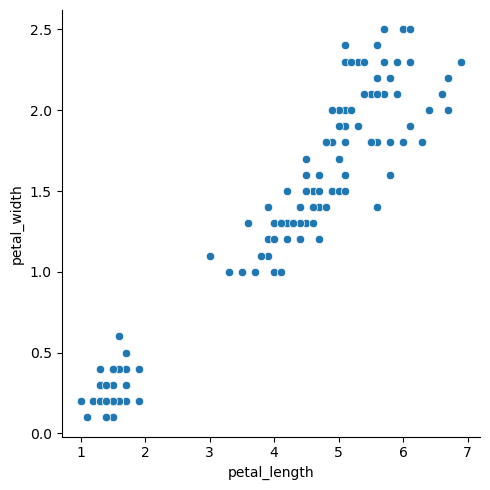

In [15]:
sns.relplot(x='petal_length',y='petal_width',data=iris)

In [16]:
# There is a positive correlation between them

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

In [18]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

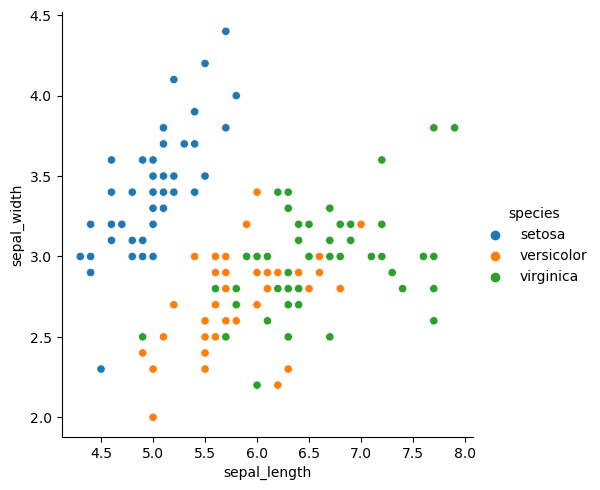

In [20]:
sns.relplot(x='sepal_length',y='sepal_width',hue='species',data=iris)

<Axes: xlabel='species', ylabel='sepal_length'>

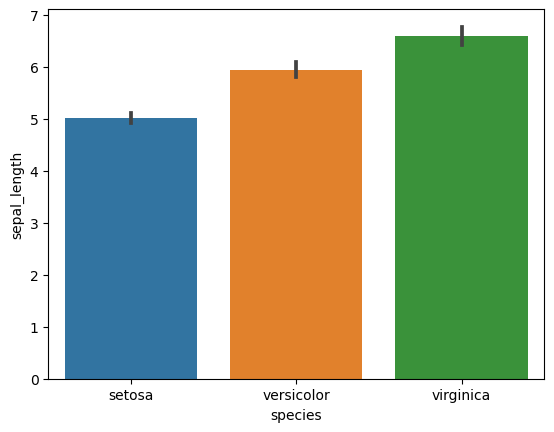

In [35]:
sns.barplot(x='species',y='sepal_length',data=iris)

<Axes: xlabel='species', ylabel='sepal_width'>

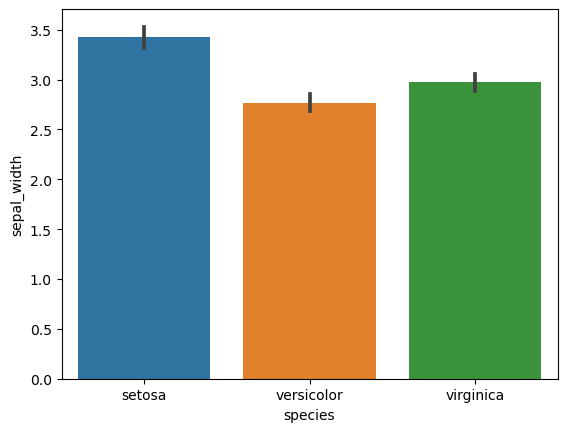

In [33]:
sns.barplot(x='species',y='sepal_width',data=iris)

4. Which features would be best used to predict species?

In [ ]:
# length because there is a more clear trend in difference between the three species

1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [40]:
ans = sns.load_dataset('anscombe')
ans.groupby(by='dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

* Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

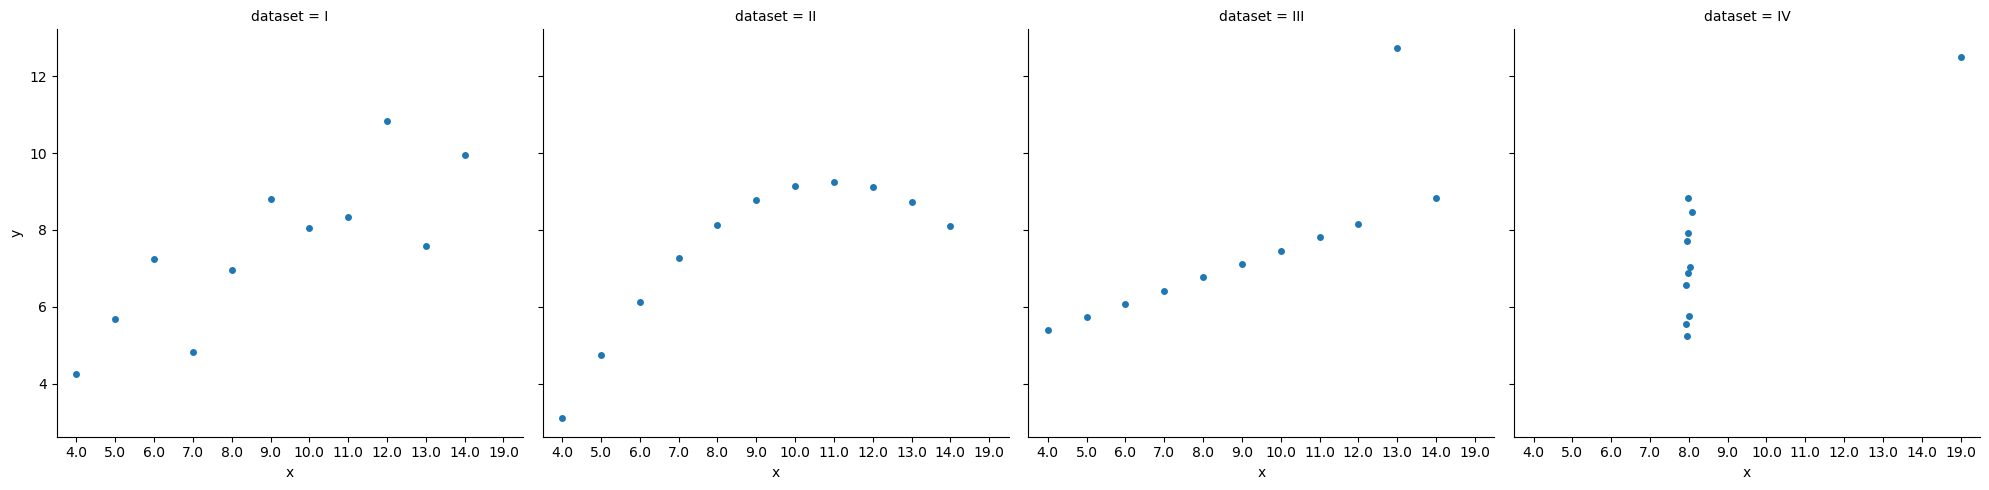

In [49]:
sns.catplot(data=ans,x='x',y='y',col='dataset')

2. Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [52]:
insect = data('InsectSprays')
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [53]:
data('InsectSprays',show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<Axes: xlabel='spray', ylabel='count'>

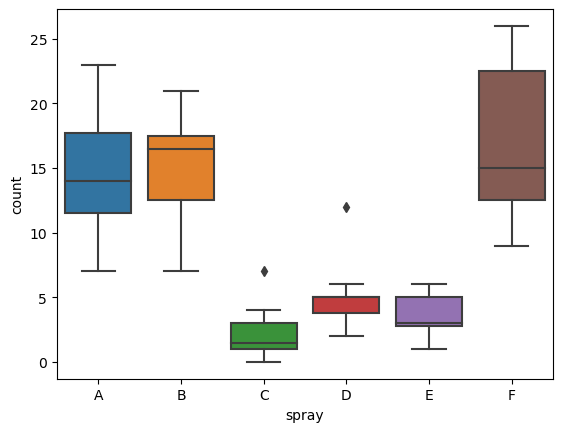

In [54]:
sns.boxplot(data=insect,x='spray',y='count')

3. Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

* Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
* Does whether or not a province is Catholic influence fertility?
* What measure correlates most strongly with fertility?

In [64]:
s = data('swiss')
s.head()
s['is_catholic'] = s['Catholic'] > 75
s.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [65]:
s.groupby(by = 'is_catholic')['Fertility'].mean()

is_catholic
False    64.770968
True     80.550000
Name: Fertility, dtype: float64

In [ ]:
# On average catholic provinces have higher fertility.

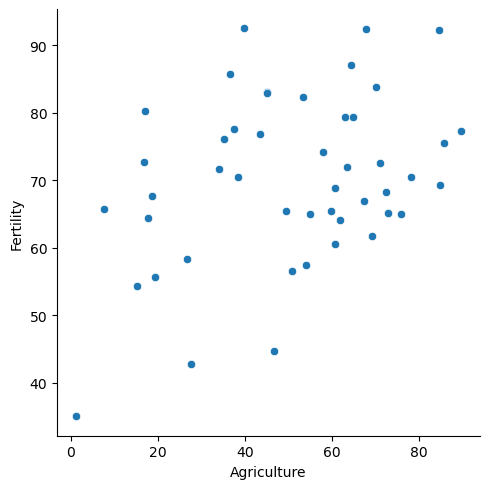

In [69]:
sns.relplot(x='Agriculture',y='Fertility',data=s)

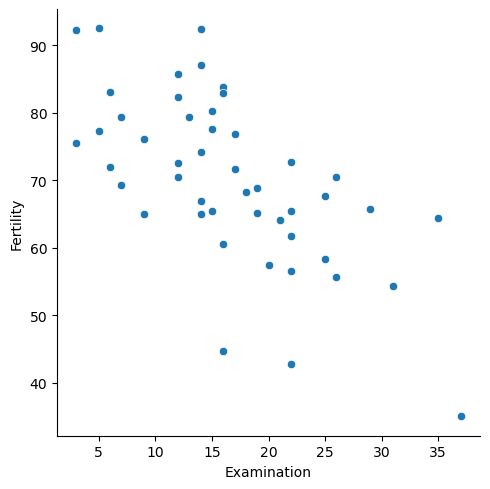

In [70]:
sns.relplot(x='Examination',y='Fertility',data=s)

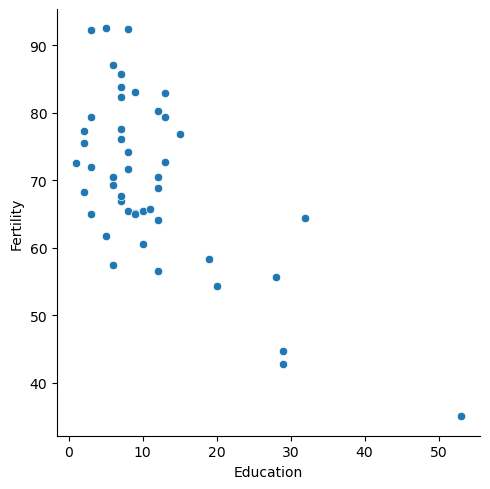

In [71]:
sns.relplot(x='Education',y='Fertility',data=s)

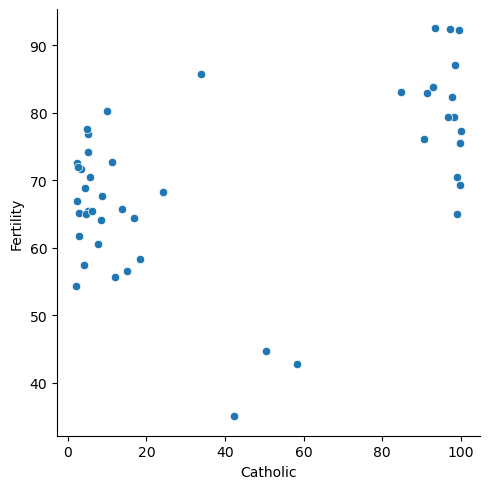

In [72]:
sns.relplot(x='Catholic',y='Fertility',data=s)

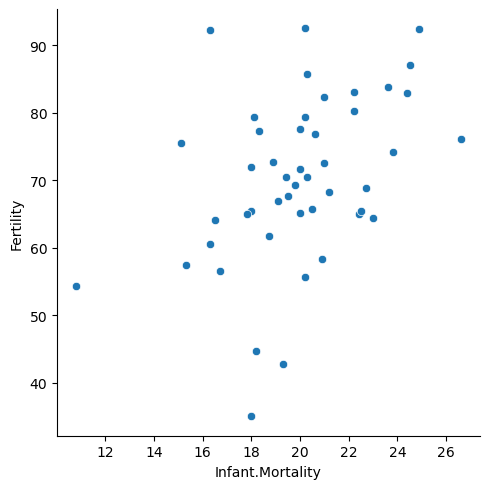

In [73]:
sns.relplot(x='Infant.Mortality',y='Fertility',data=s)

In [66]:
data('swiss',show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [ ]:
# It seems that education and examination have the strongest correlation to fertility. A negative correlation.

4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [78]:
url = get_connection('chipotle')
engine = create_engine(url)
o = text('''
        SELECT * FROM orders
        ''')
c = pd.read_sql(o,engine.connect())
c.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [88]:
c['price'] = c['item_price'].str.replace('$','').astype(float)
popular_four = c.groupby(by='item_name')['price'].sum().sort_values(ascending=False).head(4)
popular_four

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_1872/3940256951.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  c['price'] = c['item_price'].str.replace('$','').astype(float)


item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: price, dtype: float64

<Axes: xlabel='item_name'>

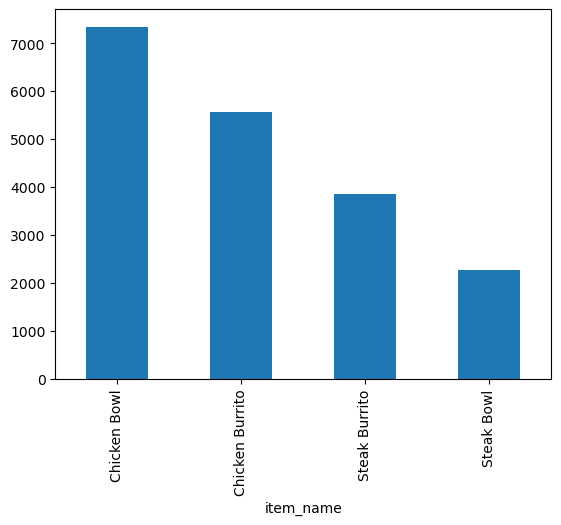

In [90]:
popular_four.plot(kind='bar')

5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [92]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<Axes: xlabel='Days', ylabel='Reaction'>

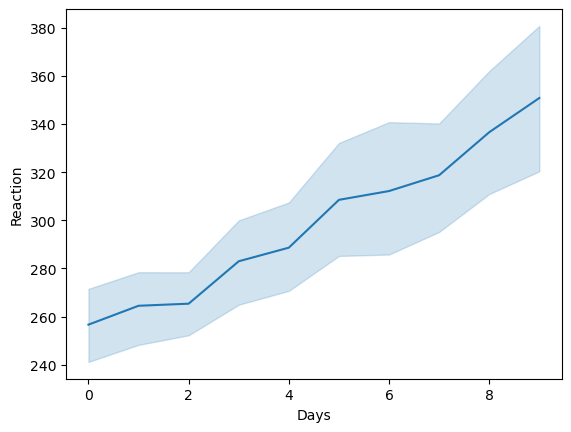

In [98]:
sns.lineplot(data=sleep,x='Days',y='Reaction')